 <b>Ashish Kumar, VM52815, akumar5@umbc.edu</b>

## Importing numpy for loading data, performing mathematical calulation and matplotlib for plotting the data of image. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the mnist labels data using numpy

In [2]:
df_labels= np.loadtxt('mnist_labels.txt')

## Displaying the length of the labels file 

In [3]:
len(df_labels)

10000

## Displaying the shape of the labels file 

In [4]:
df_labels.shape

(10000,)

## Loading the mnist data file using numpy

In [5]:
df_data = np.loadtxt('mnist_data.txt')
df_data = df_data/255.0

## Displaying the length of the  mnist data file  

In [6]:
len(df_data)

10000

## Displaying the shape of the data file 

In [7]:
df_data.shape

(10000, 784)

In [8]:
df_labels

array([7., 2., 1., ..., 4., 5., 6.])

## Converting all the all the 8 into 1 and rest to 0 in label file.

In [9]:
for i in range(len(df_labels)):
    if df_labels[i] == 8:
        df_labels[i] = 1
    else:
        df_labels[i] = 0

## Counting the number of 8 in the label 

In [10]:
np.count_nonzero(df_labels == 1)

974

## Displaying the index of all the 8 in the label dataset

In [11]:
labels_8 = np.where(df_labels == 1)
labels_8

(array([  61,   84,  110,  128,  134,  146,  177,  179,  181,  184,  226,
         232,  233,  242,  257,  260,  266,  268,  277,  290,  299,  338,
         344,  355,  373,  374,  391,  401,  403,  429,  431,  435,  436,
         458,  465,  466,  470,  474,  486,  495,  520,  527,  538,  542,
         543,  553,  563,  572,  580,  582,  591,  596,  601,  603,  606,
         621,  631,  641,  655,  664,  685,  691,  693,  709,  714,  718,
         761,  781,  787,  793,  800,  805,  806,  839,  844,  864,  872,
         876,  877,  878,  879,  899,  914,  915,  936,  947,  961,  983,
         998, 1007, 1018, 1026, 1029, 1033, 1052, 1068, 1074, 1093, 1101,
        1118, 1120, 1124, 1125, 1149, 1170, 1185, 1198, 1200, 1202, 1219,
        1225, 1229, 1234, 1248, 1249, 1259, 1267, 1268, 1286, 1287, 1312,
        1319, 1320, 1324, 1325, 1353, 1364, 1371, 1389, 1394, 1398, 1415,
        1425, 1433, 1441, 1443, 1464, 1470, 1474, 1499, 1502, 1523, 1524,
        1530, 1541, 1556, 1560, 1562, 

## Plotting few random 8 for the initial dataset without any processing.

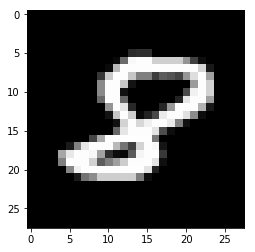

In [12]:
plt.imshow(np.reshape(df_data[61], (28,28)), cmap=plt.cm.gray)

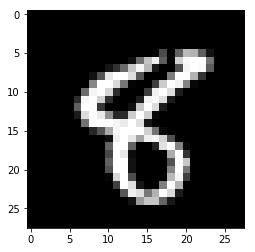

In [13]:
plt.imshow(np.reshape(df_data[84], (28,28)), cmap=plt.cm.gray)


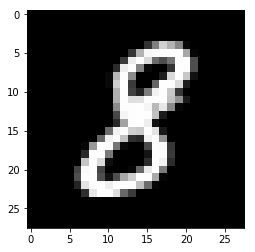

In [14]:
plt.imshow(np.reshape(df_data[110], (28,28)), cmap=plt.cm.gray)

## Sigmoid function

In [15]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

## Calculating the likelihood: arguments are df_data(feature), df_labels(target) and the weights

In [16]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll


## Stocastic Logistic regression Function with gradient descent 
<b><ul>
<li>Intializing the weighst which has the same shape as the mnist_data dataset. </li>
<li>Scores does the dot product of the df_data and weights.</li>
<li>prediction calls the sigmoid function and passes score as the argument which converts the value between 0 & 1.</li>
<li>Finding the gradient by doing the dot product between Transpose of mnist_data and output_error</li>
<li>Upgrading the weights for each iteration and keeping the learning rate as 0.00001</li>
<li>Printing the log-likelihood after a fixed iteration just to check the iteration  </li>
<li>Function returns the weight at the end. </li>
</ul></b>

In [17]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    
        
    weights = np.zeros(features.shape[1])

    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 1000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

## Calculating the weights by calling the logistic regression function: arguments are df_data, df_labels, number of step the function will run, and the learning rate.

In [18]:
weights = logistic_regression(df_data, df_labels, num_steps = 1000, learning_rate = 0.0001)

-15884.108541625961


## After training the model creating a new label dataset with the updated labels.

In [19]:
labels2 = np.dot(df_data, weights)

## Converting the new labels into 0 & 1

In [20]:
for i in range(len(labels2)):
    if labels2[i] >= 0:
        labels2[i] == 1
    else:
        labels2[i] = 0

## Calculating the accuracy

In [21]:
acc = 0
for i in range(len(df_labels)):
    if (labels2[i] == df_labels[i]):
        acc += 1
(acc/10000)*100

88.35

## Plotting the learned value of 8 after training the model

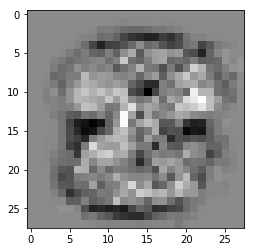

In [22]:
plt.imshow(np.reshape(weights, (28,28)), cmap=plt.cm.gray)

## Introducing the lambda constant and training the model with regularizarion having some lambda constant value.

In [23]:
def logistic_regression(features, target, num_steps, learning_rate, lambda_constant, add_intercept = False):
    
       
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * (gradient - (lambda_constant * np.sum(weights)))
        
        # Print log-likelihood every so often
        if step % 3000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [30]:
weights = logistic_regression(df_data, df_labels, num_steps = 1000, learning_rate = 0.0001, lambda_constant = 0.1)

-15884.108541625961


In [33]:
def weight_convert(df_data, weights):
    labels2 = np.dot(df_data, weights)
    for i in range(len(labels2)):
        if labels2[i] >= 0:
            labels2[i] == 1
        else:
            labels2[i] = 0
    return labels2
weight_convert(df_data, weights)

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
def accuracy(df_labels, labels2):
    acc = 0
    for i in range(len(df_labels)):
        if (labels2[i] == df_labels[i]):
            acc += 1
    return (acc/10000)*100

accuracy(df_labels, labels2)


88.35

## Printing the image after training the model with updated weights & Regularization (with lambda constant value).
<ul>
    <li>The train image depicts the supervised learning from the model.</li>
    <li>The image depicts almost 89% accuracy which is pretty good.</li>
    <li>It may appear a bit shaddy but this indicates there is no underfitting while training the model. A clear printed image may be underfitted and if the image is completely unclear then it is the case of over fitting. </li>
</ul>

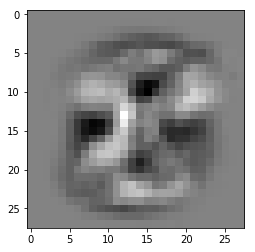

In [35]:
plt.imshow(np.reshape(weights, (28,28)), cmap=plt.cm.gray)

## Generating a plot of training set accuracy as a function of lambda for several values of lambda.

In [41]:
lambda_constant_array = [0.1, 0.4, 0.7, 0.8]
accuracy_list = []
for i in range(len(lambda_constant_array)):
    weights1 = logistic_regression(df_data, df_labels, num_steps = 1000, learning_rate = 0.00001, lambda_constant = lambda_constant_array[i])
    lab = weight_convert(df_data, weights1)
    accuracy_list.append(accuracy(df_labels, lab))

-3926.626084778216
-3926.626084778216
-3926.626084778216
-3926.626084778216


## accuracu_list is a list which stores the accuracy for each lambda constant in the lambda_constant_array.

In [39]:
accuracy_list

[88.13, 88.12, 88.09, 88.09]

## Plotting training set accuracy as a function of lambda
<b><ul>
<li>The graph indicate that with increase in the lambda constant value the accuracy of the model decreases. </li>
<li> With decrease in lambda constant value the accuracy of the model increases.</li>
</ul></b>

Text(0,0.5,'Accuracy')

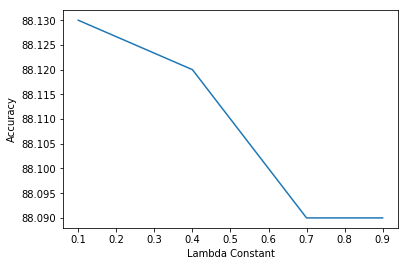

In [40]:
plt.plot(lambda_constant_array, accuracy_list)
plt.xlabel('Lambda Constant')
plt.ylabel('Accuracy')